In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance
from ta import add_all_ta_features
import yfinance
from prophet import Prophet
import os
from ta import add_all_ta_features
import pickle

from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:

# Data Extraction
#symbols = [ "^NSEI","^NSEBANK" , "^CNXFMCG","NIFTY_FIN_SERVICE.NS","^CNXIT","NIFTY_PVT_BANK.NS","^CNXMETAL"]
# ["INR=X","^DJI","^DJI","^FTSE","BTC-USD","^VIX","RTY=F"]

symbol = "^NSEI"
#symbols = ["OLECTRA.NS","CONCOR.NS","ELGIEQUIP.NS","IOC.NS","BEL.NS","TATAELXSI.NS","^NSEI","HDFCBANK.NS","TATAMOTORS.NS","SBIN.NS",
#"TCS.NS","TITAN.NS","SUNPHARMA.BO","TECHM.NS", "ASIANPAINT.NS","TATACONSUM.NS"]

#df = pd.read_csv("./stock_historical_data/{}.csv".format(symbol))
data = yfinance.download (tickers = "{}".format(symbol),start="2007-03-06",
                            interval = "1d", group_by = 'ticker', auto_adjust = True)



data = data[["Open", "High", "Low", "Close","Volume"]]
data["Returns"] = data["Close"].pct_change()
data["Range"] = data["High"] / data["Low"] - 1
data["Avg_Range"] = data["Range"].rolling(window=30).mean()
data.tail()

def exponential_moving_average(data, window):
    if len(data) < window:
        raise ValueError("Data length should be greater than or equal to the window size.")
    
    alpha = 2 / (window + 1)
    ema = [data[0]]

    for i in range(1, len(data)):
        ema_value = alpha * data[i] + (1 - alpha) * ema[-1]
        ema.append(ema_value)
    return ema

[*********************100%***********************]  1 of 1 completed


In [3]:
#visulazation
import seaborn as sns


In [10]:
data.dropna(inplace=True)

In [13]:
data["Gap"] = data["Open"] - data["Close"].shift(1)

In [15]:
data.dropna(inplace=True)

<Axes: xlabel='Returns'>

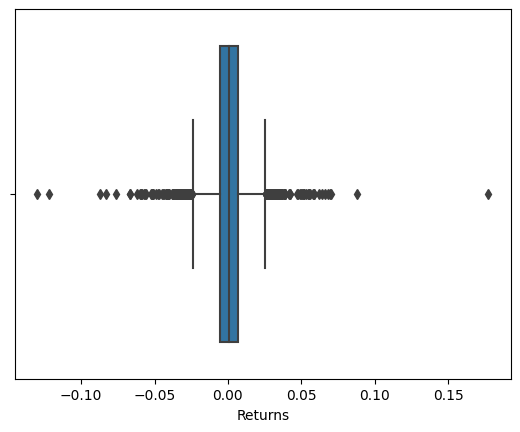

In [23]:
sns.boxplot(x=data["Returns"])

In [17]:
def findOutLayer(data):
    # Calculate the Interquartile Range (IQR)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound,upper_bound

In [32]:
lw,ob = findOutLayer(data["Returns"])
#print(lw,ob)
outliers = (data["Returns"] < lw) | (data["Returns"] > ob)
cleaned_data= data[~outliers]


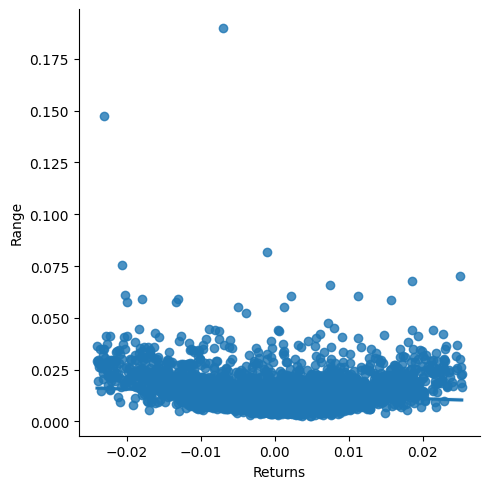

In [33]:
sns.lmplot(data=cleaned_data,x="Returns",y="Range")

In [ ]:
ct = pd.crosstab(data["Gender"],data["Make"])
ct.plot(kind="bar",stacked=True)